In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from pandas.plotting import scatter_matrix

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
results = pd.read_csv('results.csv')
driver_standings = pd.read_csv('driver_standings.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')

In [4]:
drivers = pd.read_csv('drivers.csv')

In [5]:
results.head()
results.dtypes
driver_standings.head()
driver_standings.dtypes
constructor_standings.head()
constructor_standings.dtypes
drivers.head()
drivers.dtypes

driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
url            object
dtype: object

In [6]:
results = results[["raceId", "driverId", "constructorId", "grid", "position"]]
results.head()

,raceId,driverId,constructorId,grid,position
0,18,1,1,1,1
1,18,2,2,5,2
2,18,3,3,7,3
3,18,4,4,11,4
4,18,5,1,3,5


In [7]:
driver_standings = driver_standings[["raceId", "driverId", "position"]]
# Rename the "position" column do avoid conflict with the "position" column from results.csv
driver_standings = driver_standings.rename(columns={"position": "driverStanding"})
# Use current driver standings for the next race
driver_standings["raceId"] += 1
driver_standings.head()

,raceId,driverId,driverStanding
0,19,1,1
1,19,2,2
2,19,3,3
3,19,4,4
4,19,5,5


In [8]:
# Again, picking the columns we need and renaming "position"
constructor_standings = constructor_standings[["raceId", "constructorId", "position"]]
constructor_standings = constructor_standings.rename(columns={"position": "constructorStanding"})
# Use current constructor standings for the next race
constructor_standings["raceId"] += 1
constructor_standings.head()

,raceId,constructorId,constructorStanding
0,19,1,1
1,19,2,3
2,19,3,2
3,19,4,4
4,19,5,5


In [9]:
# Joining results with driver standings.
results_driver_standings = pd.merge(results, driver_standings, on=["raceId", "driverId"], how="inner")
results_driver_standings.head()

,raceId,driverId,constructorId,grid,position,driverStanding
0,18,1,1,1,1,5
1,18,2,2,5,2,13
2,18,3,3,7,3,7
3,18,4,4,11,4,9
4,18,5,1,3,5,12


In [10]:
joined_data = pd.merge(results_driver_standings, constructor_standings, on=["raceId", "constructorId"], how="inner")
joined_data.head()

,raceId,driverId,constructorId,grid,position,driverStanding,constructorStanding
0,18,1,1,1,1,5,3
1,18,5,1,3,5,12,3
2,18,2,2,5,2,13,6
3,18,9,2,2,\N,14,6
4,18,3,3,7,3,7,7


In [11]:
joined_data.sort_values(by='raceId', ascending=False).head(60)


,raceId,driverId,constructorId,grid,position,driverStanding,constructorStanding
22157,1096,825,210,16,17,13,8
22147,1096,4,214,10,\N,9,4
22138,1096,830,9,1,1,1,1
22139,1096,815,9,2,3,3,1
22140,1096,844,6,3,2,2,2
22141,1096,832,6,4,4,6,2
22142,1096,847,131,6,5,4,3
22144,1096,846,1,7,6,7,5
22145,1096,817,1,13,9,12,5
22146,1096,839,214,8,7,8,4


In [12]:
#lewis_Hamilton_Races
joined_data.loc[joined_data["driverId"] == 1].head()

,raceId,driverId,constructorId,grid,position,driverStanding,constructorStanding
0,18,1,1,1,1,5,3
19,19,1,1,9,5,1,1
29,20,1,1,3,13,1,1
45,21,1,1,5,3,3,3
66,22,1,1,3,2,2,3


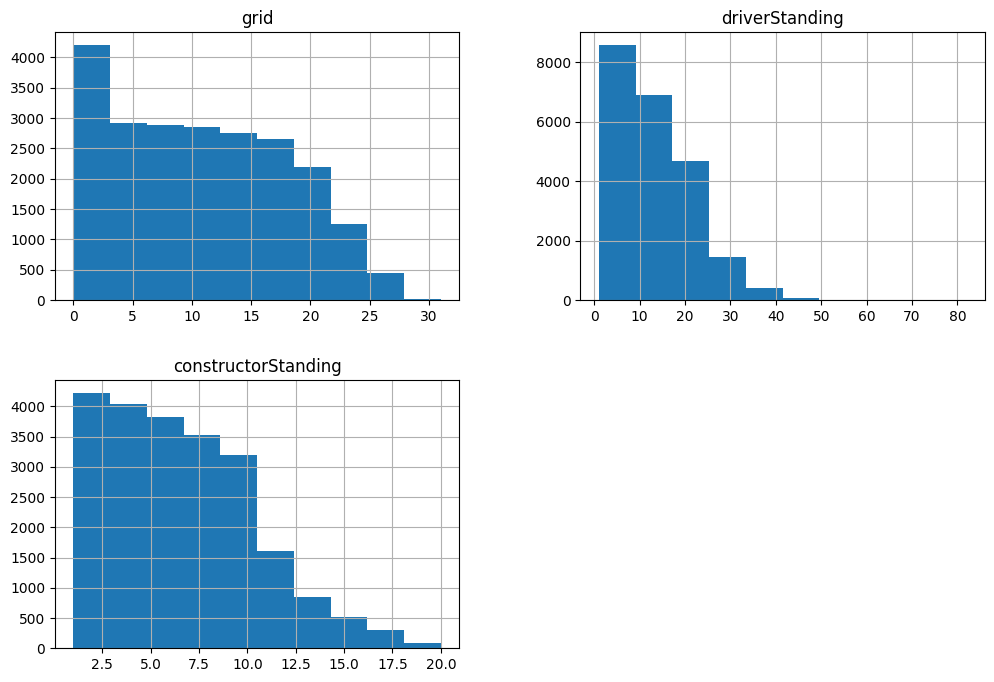

In [13]:
joined_data[["grid", "driverStanding", "constructorStanding", "position"]].hist(figsize=(12, 8))
plt.show()

In [14]:
#We have grid positions over 20 when we know that the maximum number of cars that can start a race is currently set at 20 by the FIA.
#Most probably it is 
# Doing this so that we can get rid of races oleder than 10 years from our dataset
races = pd.read_csv('races.csv')
races.loc[races['year'] == 2023].sort_values(by="raceId", ascending=True).head(20)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1079,1098,2023,1,3,Bahrain Grand Prix,2023-03-05,15:00:00,https://en.wikipedia.org/wiki/2023_Bahrain_Gra...,2023-03-03,11:30:00,2023-03-03,15:00:00,2023-03-04,11:30:00,2023-03-04,15:00:00,\N,\N
1080,1099,2023,2,77,Saudi Arabian Grand Prix,2023-03-19,17:00:00,https://en.wikipedia.org/wiki/2023_Saudi_Arabi...,2023-03-17,13:30:00,2023-03-17,17:00:00,2023-03-18,13:30:00,2023-03-18,17:00:00,\N,\N
1081,1100,2023,3,1,Australian Grand Prix,2023-04-02,05:00:00,https://en.wikipedia.org/wiki/2023_Australian_...,2023-03-31,01:30:00,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,\N,\N
1082,1101,2023,4,73,Azerbaijan Grand Prix,2023-04-30,11:00:00,https://en.wikipedia.org/wiki/2023_Azerbaijan_...,2023-04-28,09:30:00,2023-04-29,09:30:00,\N,\N,2023-04-28,13:00:00,2023-04-29,13:30:00
1083,1102,2023,5,79,Miami Grand Prix,2023-05-07,19:30:00,https://en.wikipedia.org/wiki/2023_Miami_Grand...,2023-05-05,17:30:00,2023-05-05,21:00:00,2023-05-06,16:30:00,2023-05-06,20:00:00,\N,\N
1084,1103,2023,6,21,Emilia Romagna Grand Prix,2023-05-21,13:00:00,https://en.wikipedia.org/wiki/2023_Emilia_Roma...,2023-05-19,11:30:00,2023-05-19,15:00:00,2023-05-20,10:30:00,2023-05-20,14:00:00,\N,\N
1085,1104,2023,7,6,Monaco Grand Prix,2023-05-28,13:00:00,https://en.wikipedia.org/wiki/2023_Monaco_Gran...,2023-05-26,11:30:00,2023-05-26,15:00:00,2023-05-27,10:30:00,2023-05-27,14:00:00,\N,\N
1086,1105,2023,8,4,Spanish Grand Prix,2023-06-04,13:00:00,https://en.wikipedia.org/wiki/2023_Spanish_Gra...,2023-06-02,11:30:00,2023-06-02,15:00:00,2023-06-03,10:30:00,2023-06-03,14:00:00,\N,\N
1087,1106,2023,9,7,Canadian Grand Prix,2023-06-18,18:00:00,https://en.wikipedia.org/wiki/2023_Canadian_Gr...,2023-06-16,17:30:00,2023-06-16,21:00:00,2023-06-17,16:30:00,2023-06-17,20:00:00,\N,\N
1088,1107,2023,10,70,Austrian Grand Prix,2023-07-02,13:00:00,https://en.wikipedia.org/wiki/2023_Austrian_Gr...,2023-06-30,11:30:00,2023-07-01,10:30:00,\N,\N,2023-06-30,15:00:00,2023-07-01,14:30:00


In [15]:
joined_data = joined_data[joined_data["raceId"] > 880]
joined_data.head(20)

,raceId,driverId,constructorId,grid,position,driverStanding,constructorStanding
18241,881,20,9,1,1,3,3
18242,881,17,9,5,2,6,3
18243,881,1,131,4,3,5,4
18244,881,3,131,6,4,20,4
18245,881,13,6,2,5,4,1
18246,881,4,6,3,\N,2,1
18247,881,154,208,11,6,10,2
18248,881,8,208,10,7,1,2
18249,881,807,15,12,8,22,8
18250,881,821,15,14,12,13,8


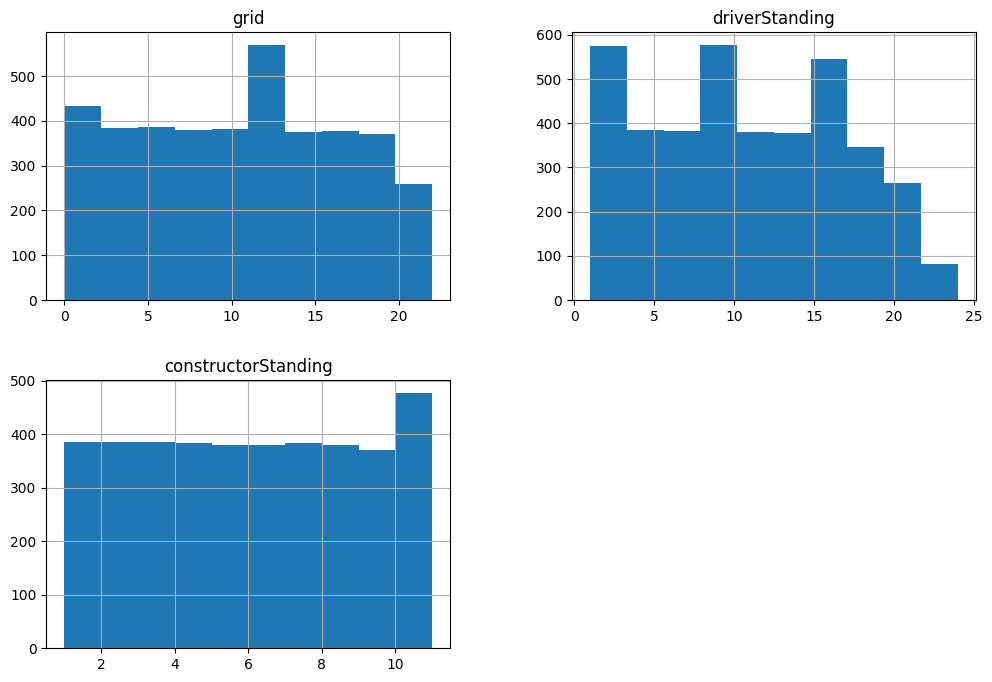

In [16]:
joined_data[["grid", "driverStanding", "constructorStanding", "position"]].hist(figsize=(12, 8))
plt.show()


In [17]:
# Getting rid of a few more columns that we don't need anymore
dataset = joined_data[["grid", "driverStanding", "constructorStanding", "position",]]
joined_data.head()

,raceId,driverId,constructorId,grid,position,driverStanding,constructorStanding
18241,881,20,9,1,1,3,3
18242,881,17,9,5,2,6,3
18243,881,1,131,4,3,5,4
18244,881,3,131,6,4,20,4
18245,881,13,6,2,5,4,1


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3916 entries, 18241 to 22157
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grid                 3916 non-null   int64 
 1   driverStanding       3916 non-null   int64 
 2   constructorStanding  3916 non-null   int64 
 3   position             3916 non-null   object
dtypes: int64(3), object(1)
memory usage: 153.0+ KB


In [19]:
# Filter out rows where the position is not numeric (remember the "\N" before?)
dataset = dataset[dataset.position.apply(lambda x: x.isnumeric())]
# Filter out rows where grid is 0
dataset = dataset[dataset.grid.apply(lambda x: x > 0)]
# Change type for position values to integers
dataset.position = dataset.position.astype('int')

dataset

,grid,driverStanding,constructorStanding,position
18241,1,3,3,1
18242,5,6,3,2
18243,4,5,4,3
18244,6,20,4,4
18245,2,4,1,5
...,...,...,...,...
22153,18,10,6,15
22154,19,19,10,13
22155,20,20,10,19
22156,12,16,8,16


In [20]:
races.loc[races['year'] == 2023].sort_values(by="raceId", ascending=True).head(20)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1079,1098,2023,1,3,Bahrain Grand Prix,2023-03-05,15:00:00,https://en.wikipedia.org/wiki/2023_Bahrain_Gra...,2023-03-03,11:30:00,2023-03-03,15:00:00,2023-03-04,11:30:00,2023-03-04,15:00:00,\N,\N
1080,1099,2023,2,77,Saudi Arabian Grand Prix,2023-03-19,17:00:00,https://en.wikipedia.org/wiki/2023_Saudi_Arabi...,2023-03-17,13:30:00,2023-03-17,17:00:00,2023-03-18,13:30:00,2023-03-18,17:00:00,\N,\N
1081,1100,2023,3,1,Australian Grand Prix,2023-04-02,05:00:00,https://en.wikipedia.org/wiki/2023_Australian_...,2023-03-31,01:30:00,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,\N,\N
1082,1101,2023,4,73,Azerbaijan Grand Prix,2023-04-30,11:00:00,https://en.wikipedia.org/wiki/2023_Azerbaijan_...,2023-04-28,09:30:00,2023-04-29,09:30:00,\N,\N,2023-04-28,13:00:00,2023-04-29,13:30:00
1083,1102,2023,5,79,Miami Grand Prix,2023-05-07,19:30:00,https://en.wikipedia.org/wiki/2023_Miami_Grand...,2023-05-05,17:30:00,2023-05-05,21:00:00,2023-05-06,16:30:00,2023-05-06,20:00:00,\N,\N
1084,1103,2023,6,21,Emilia Romagna Grand Prix,2023-05-21,13:00:00,https://en.wikipedia.org/wiki/2023_Emilia_Roma...,2023-05-19,11:30:00,2023-05-19,15:00:00,2023-05-20,10:30:00,2023-05-20,14:00:00,\N,\N
1085,1104,2023,7,6,Monaco Grand Prix,2023-05-28,13:00:00,https://en.wikipedia.org/wiki/2023_Monaco_Gran...,2023-05-26,11:30:00,2023-05-26,15:00:00,2023-05-27,10:30:00,2023-05-27,14:00:00,\N,\N
1086,1105,2023,8,4,Spanish Grand Prix,2023-06-04,13:00:00,https://en.wikipedia.org/wiki/2023_Spanish_Gra...,2023-06-02,11:30:00,2023-06-02,15:00:00,2023-06-03,10:30:00,2023-06-03,14:00:00,\N,\N
1087,1106,2023,9,7,Canadian Grand Prix,2023-06-18,18:00:00,https://en.wikipedia.org/wiki/2023_Canadian_Gr...,2023-06-16,17:30:00,2023-06-16,21:00:00,2023-06-17,16:30:00,2023-06-17,20:00:00,\N,\N
1088,1107,2023,10,70,Austrian Grand Prix,2023-07-02,13:00:00,https://en.wikipedia.org/wiki/2023_Austrian_Gr...,2023-06-30,11:30:00,2023-07-01,10:30:00,\N,\N,2023-06-30,15:00:00,2023-07-01,14:30:00


In [21]:
race_info = races[["raceId","name", "year", "circuitId", "date",]]

In [22]:
race_info = race_info[race_info["raceId"] > 880]
race_info.head()


,raceId,name,year,circuitId,date
879,881,Malaysian Grand Prix,2013,2,2013-03-24
880,882,Chinese Grand Prix,2013,17,2013-04-14
881,883,Bahrain Grand Prix,2013,3,2013-04-21
882,884,Spanish Grand Prix,2013,4,2013-05-12
883,885,Monaco Grand Prix,2013,6,2013-05-26


In [23]:
#now lets take look at correlations in datasets


In [24]:
dataset.corr()["position"]

grid                   0.750109
driverStanding         0.742595
constructorStanding    0.750760
position               1.000000
Name: position, dtype: float64

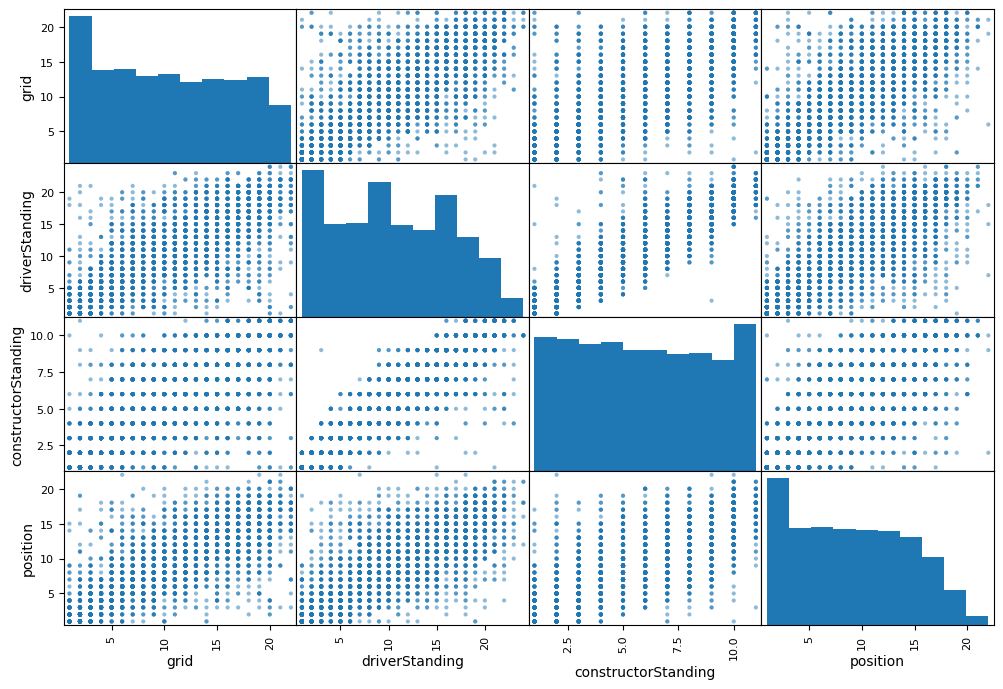

In [25]:
scatter_matrix(dataset, figsize=(12,8))
plt.show()

max_grid = 22; max_position = 22; max_d_position = 24; max_c_position = 11


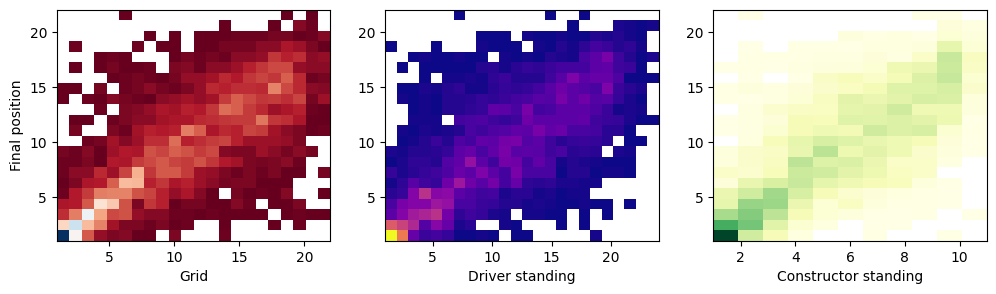

In [26]:
#lets visulaise correlations with bi-dimensional histograms
fig,ax = plt.subplots(1, 3, figsize=(12, 3))

# https://stackoverflow.com/a/20105673/3015186
max_grid = dataset.grid.max()
max_position = dataset.position.max()
max_d_position = dataset.driverStanding.max()
max_c_position = dataset.constructorStanding.max()
print(f"max_grid = {max_grid}; max_position = {max_position}; max_d_position = {max_d_position}; max_c_position = {max_c_position}")

ax[0].hist2d(dataset.grid, dataset.position, (max_grid, max_position), cmap='RdBu', cmin=1)
ax[0].set_xlabel("Grid")
ax[0].set_ylabel("Final position")
ax[1].hist2d(dataset.driverStanding, dataset.position, (max_d_position, max_position), cmap='plasma', cmin=1)
ax[1].set_xlabel("Driver standing")
ax[2].hist2d(dataset.constructorStanding, dataset.position, (max_c_position, max_position), cmap='YlGn', cmin=1)
ax[2].set_xlabel("Constructor standing")

plt.show()

In [27]:
#we see here that there is linear relationship between the features and final results but the data points are widely scattered so we probably wont get luch accurate predictions

In [28]:
#so we have to train our data


In [29]:
x_train = dataset[['grid', 'driverStanding', 'constructorStanding']].values
y_train = dataset[['position']].values.reshape(-1) 
print(f'{x_train.shape}; {y_train.shape}')
print(x_train)
print(y_train)

(3258, 3); (3258,)
[[ 1  3  3]
 [ 5  6  3]
 [ 4  5  4]
 ...
 [20 20 10]
 [12 16  8]
 [16 13  8]]
[ 1  2  3 ... 19 16 17]


In [30]:
#we use simple linear regression here

In [31]:
def compute_cost(x, y, w, b):
    # Get number of examples
    m = x.shape[0]
    # Initialise cost
    cost = 0
    for i in range(m):
        f_wb_i = x[i].dot(w) + b
        cost += (f_wb_i - y[i]) ** 2
    return cost / (2 * m)

In [33]:
##Let's try out the cost function with all weights and bias initialised to 0

w_init = [0, 0, 0]
b_init = 0
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"Cost = {cost}")

Cost = 55.43278084714549


In [35]:
#First we go ahead and implement a function to calculate the gradient and then another to calculate the gradient descent.
def compute_gradient(x, y, w, b):
    # Get number of examples and features
    m, n = x.shape
    # Initialise gradient of the cost w.r.t the parameters w
    dj_dw = np.zeros((n,))
    # Initialise gradient of the cost w.r.t the parameter b
    dj_db = 0.
    
    for i in range(m):
        loss = (x[i].dot(w) + b) - y[i] # Loss is the same for both derivatives
        for j in range (n):
            dj_dw[j] += loss * x[i][j] 
        dj_db += loss
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db


In [36]:
# Let's try to compute the gradient for our initial weights and bias
compute_gradient(x_train, y_train, w_init, b_init)

(array([-118.62400246, -120.44229589,  -61.77931246]), -9.169429097605892)

In [37]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # Store history of costs (J). This will be used when we print out the progress.
    J_history = []

    w = copy.deepcopy(w_in)
    b = b_in
    
    # Apply gradient descent num_iters times
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        # Update w and b based on gradient, at the same time (this is important)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J_history.append(compute_cost(X, y, w, b))
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.8f}   ")
    
    return w, b, J_history

In [39]:
import copy, math

# Initial values taken from a previous descent, so as not to start from 0
initial_w = np.array([0.37888087, 0.05009108, 0.32510837])
initial_b = 2.7796157637505052
iterations = 10000
alpha = 3.5e-3

print("Running gradient descent...")
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b = {b_final}; w = {w_final} ")

Running gradient descent...
Iteration    0: Cost 4.98900555   
Iteration 1000: Cost 4.68054531   
Iteration 2000: Cost 4.62995299   
Iteration 3000: Cost 4.61832210   
Iteration 4000: Cost 4.61564821   
Iteration 5000: Cost 4.61503350   
Iteration 6000: Cost 4.61489218   
Iteration 7000: Cost 4.61485969   
Iteration 8000: Cost 4.61485222   
Iteration 9000: Cost 4.61485050   
b = 1.1346913859860666; w = [0.34919898 0.16862326 0.47748792] 


In [41]:
#let us do some predictions within the trainig data and compare them with actual postition and see the accuracy
for i in range(15):
    f = x_train[i+100].dot(w_final) + b_final
    prediction = np.round(f).astype(int)
    actual = y_train[i+100]
    print(f"Prediction: {prediction:3d}, Actual position: {actual:3d}, Accuracy: {100 - (abs(prediction - actual) / actual) * 100.0:3.0f}%")

Prediction:   5, Actual position:   5, Accuracy: 100%
Prediction:   9, Actual position:   6, Accuracy:  50%
Prediction:  11, Actual position:  15, Accuracy:  73%
Prediction:  11, Actual position:   7, Accuracy:  43%
Prediction:   8, Actual position:  10, Accuracy:  80%
Prediction:   6, Actual position:   9, Accuracy:  67%
Prediction:  12, Actual position:  13, Accuracy:  92%
Prediction:  10, Actual position:  11, Accuracy:  91%
Prediction:  11, Actual position:  12, Accuracy:  92%
Prediction:   9, Actual position:  14, Accuracy:  64%
Prediction:  13, Actual position:  16, Accuracy:  81%
Prediction:  16, Actual position:  17, Accuracy:  94%
Prediction:  16, Actual position:  19, Accuracy:  84%
Prediction:  16, Actual position:  18, Accuracy:  89%
Prediction:  13, Actual position:  20, Accuracy:  65%


In [42]:
#average difference between our model and prediction
differences = np.zeros(x_train.shape[0])
for i in range(x_train.shape[0]):
    f = x_train[i].dot(w_final) + b_final
    prediction = np.round(f).astype(int)
    actual = y_train[i]
    differences[i] = abs(prediction-actual)
print(f"Average difference: {np.average(differences):2.0f}")

Average difference:  2


In [44]:
#so here is our model
def predict(grid, driver_standing, constructor_standing):
    prediction = np.array([grid, driver_standing, constructor_standing]).dot([0.34919898, 0.16862326, 0.47748792]) + 1.1346913859860654
    return np.round(prediction).astype(int)

In [45]:
predict(3, 5, 2)

4

In [50]:
#lets take five drivers - Max Verstappen, Lewis Hamilton, Carlos Sainz jr, Fernando Alonso and Lando Norris and predict the result 
#Lets take recent British GP 2023 here
VER = predict(1, 1, 1)
HAM = predict(7, 3, 2)
SAI = predict(5, 5, 4)
ALO = predict(9, 3, 3)
NOR = predict(2, 8, 5)
print(f"Predictions: VER - {VER}, HAM - {HAM}, SAI - {SAI}, ALO - {ALO}, NOR-{NOR}")

Predictions: VER - 2, HAM - 5, SAI - 6, ALO - 6, NOR-6


In [51]:
#even though it is clear that Verstappen is more likely to finish 1st here, but we'll givew our model the benefit of the doubt.